# Es 08.1

Si richiede di simulare, tramite l'algoritmo di Metropolis con matrice di transizione uniforme, la funzione d'onda rappresentante il ground state di una particella vincolata a un potenziale 1D del tipo:

$$V(x) = x^4 - \frac{5}{2}x^2$$

Per fare ciò usiamo supponiamo una funzione d'onda del tipo:

$$\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$$

con cui verrà effettuato il calcolo per l'energia media con una funzione del tipo:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

si discutono i risultati nell'**Esercizio 08.2**.

# Es 08.2

Una volta implementato il metodo per il data blocking di $\langle {\hat H} \rangle_T$  si richiede si valutare i migliori $\mu$ e $\sigma$ da inserire nella funzione d'onda. A seguito di tale simulazione i risultati ottenuti sono:

$$\mu=0.8075 \quad \sigma=0.675$$

con un passo di campionamento per l'algoritmo di Metropolis uniforme pari a $passo=2.8$ con cui si è ottenuto un rate di accettazione di 49,809%.

Si riporta qui sotto il valore atteso per l'energia di ground state calcolato numericamente:

In [3]:
def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1) # central differences method
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V) # hamiltonian matrix
E,psi = np.linalg.eigh(H) # eigenvectors and eigenvalues
psi = np.transpose(psi) # transpose 
psi = psi/np.sqrt(dx) # normalize

print("L'energia del ground state calcolata numericamente è: ", E[0])

mu = 0.8075
sig = 0.675

def psi_T2(x):
    return (np.exp(-(x-mu)**2/(2*sig**2)) + np.exp(-(x+mu)**2/(2*sig**2)))**2

norm = integrate.quad(lambda x: psi_T2(x), -4, 4)
psi_T = np.exp(-(x-mu)**2/(2*sig**2)) + np.exp(-(x+mu)**2/(2*sig**2))

L'energia del ground state calcolata numericamente è:  -0.46046587969271535


Si riporta ora il grafico ottenuto per l'energia media di ground state ottenuto a seguito di blocking method e un istogramma che riporta i punti verificati dal $|\Psi_T(x)|^2$ comparata con la curva analitica e la funzione esatta di ground state calcolata analiticamente.

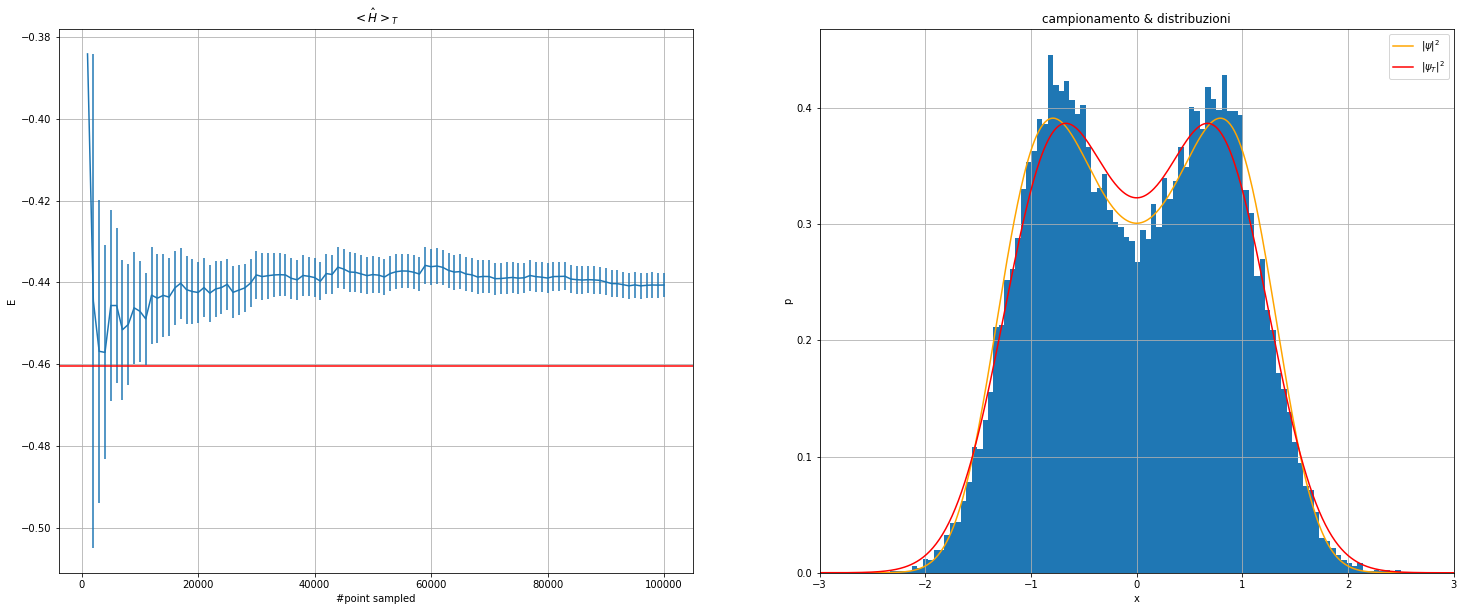

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate

data_file=np.loadtxt('Es08/Data1.dat')
data_file2=np.loadtxt('Es08/config.dat')

point=data_file [:,0]
sum_prog=data_file [:,1]
err_prog=data_file[:,2]
conf=data_file2[:]

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(25,10))

axes[0].errorbar(point,sum_prog,yerr=err_prog)
axes[0].set_xlabel('#point sampled')
axes[0].set_ylabel('E')
axes[0].set_title('$< {\hat H} >_T$')
axes[0].axhline(y=-0.46046587969271535,color='red')
axes[0].grid(True)



axes[1].hist(conf, bins=100, density=True)
axes[1].set_title('campionamento & distribuzioni')
axes[1].plot(x,(psi[0])**2, color='orange',label='$|\psi|^2$')
axes[1].plot(x,(psi_T)**2/norm[0], color='red',label='$|\psi_T|^2$')
axes[1].set_xlim((-3,3))
axes[1].set_xlabel("x")
axes[1].set_ylabel("p")
axes[1].grid(True)
axes[1].legend()

plt.show()

L'energia ottenuta a seguito di data blocking è leggermente rispetto a quella ground state, ciò è giustificato dal fatto che è un metodo variazionale e pertanto mi aspetto di trovare un'energia più alta rispetto a quella calcolata numericamente. Inoltre si mostra come la funzione fornitaci ha un andamento simile alla $\psi$ esatta del ground state, e ciò si osserva sia nell'istogramma rappresentatnte i punti campionati, sia con la sovrapposizione dei plot delle funzioni $\psi$ calcolate in precedenza.

# Es 08.3 

Si richiede di studiare, tramite l'algoritmo PIMC/PIGS, lo stesso sistema visto in precedenza con:
- una funzione d'onda banale, $\Psi_T(x)=1$
- usando $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ coi parametri ottimizzati nell'es 08.2.
per quanto riguarda l'algoritmo PIGS e compararli coi risultati precedenti.

Inoltre si chiede di verificare come cambia l'istogramma dei punti campionati con l'algoritmo PIMC al variare del tempo immaginario. Si chiede inoltre di verificare come cambia il campionamento a seguito di un campiamento di $T$.

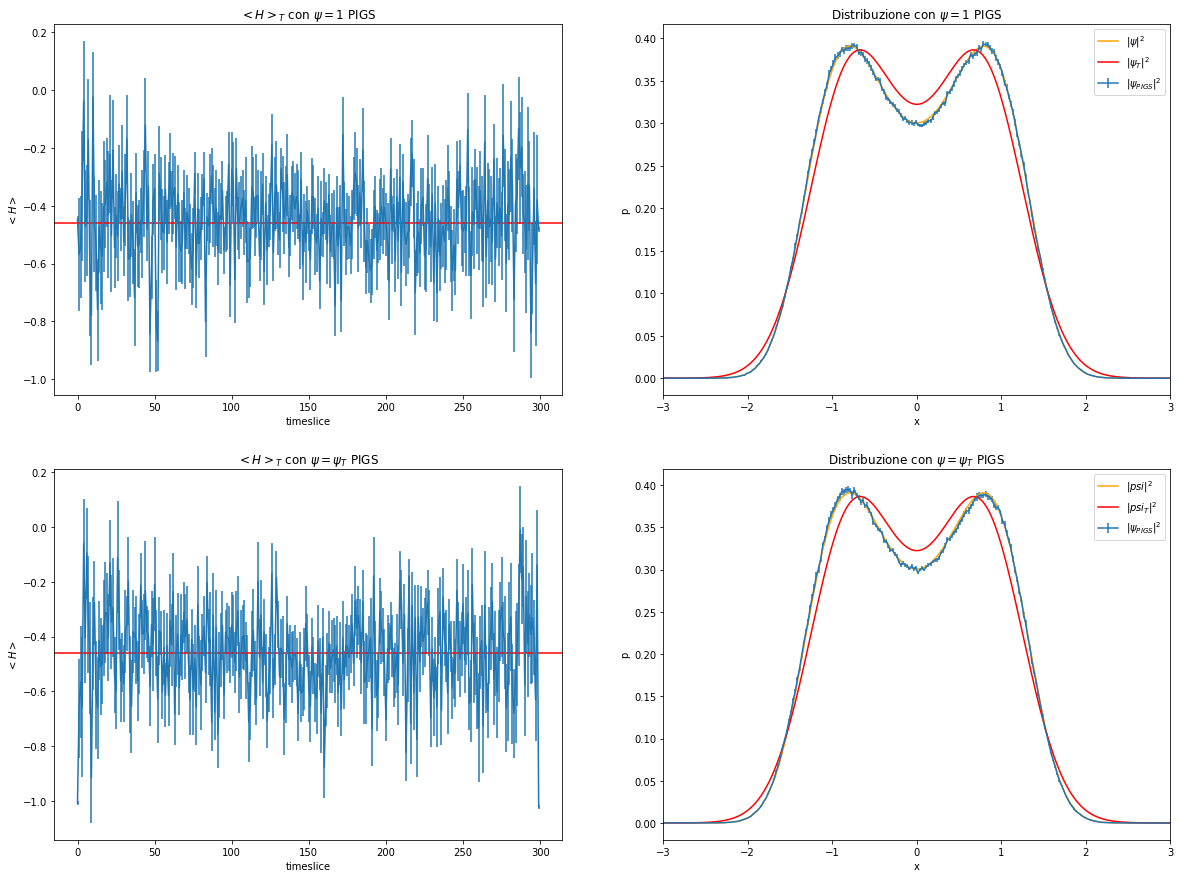

In [77]:
ku=np.loadtxt('Dati/kinetic.const.dat')
kpigs8=np.loadtxt('Dati/kinetic.My8.dat')

uu=np.loadtxt('Dati/potential.const.dat')
upigs8=np.loadtxt('Dati/potential.My8.dat')

pu=np.loadtxt('Dati/probability.const.dat')
ppigs8=np.loadtxt('Dati/probability.My8.dat')

Eu=ku[:,1]+uu[:,1]
erreu=np.sqrt(ku[:,2]**2+uu[:,2]**2)
Epigs=kpigs8[:,1]+upigs8[:,1]
errepigs=np.sqrt(kpigs8[:,2]**2+upigs8[:,2]**2)

figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))

axes[0,0].errorbar(uu[:,0],Eu,yerr=erreu)
axes[0,0].set_title('$<H>_T$ con $\psi=1$ PIGS')
axes[0,0].set_xlabel('timeslice')
axes[0,0].set_ylabel('$<H>$')
axes[0,0].axhline(y=-0.46046587969271535,color='red')

axes[0,1].errorbar(pu[:,0],pu[:,1],yerr=pu[:,2],label='$|\psi_{PIGS}|^2$')
axes[0,1].set_title('Distribuzione con $\psi=1$ PIGS')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('p')
axes[0,1].plot(x,(psi[0])**2, color='orange',label='$|\psi|^2$')
axes[0,1].plot(x,(psi_T)**2/norm[0], color='red',label='$|\psi_T|^2$')
axes[0,1].set_xlim(-3,3)
axes[0,1].legend()

axes[1,0].errorbar(upigs8[:,0],Epigs,yerr=errepigs)
axes[1,0].set_title('$<H>_T$ con $\psi=\psi_T$ PIGS')
axes[1,0].set_xlabel('timeslice')
axes[1,0].set_ylabel('$<H>$')
axes[1,0].axhline(y=-0.46046587969271535,color='red')

axes[1,1].errorbar(ppigs8[:,0],ppigs8[:,1],yerr=ppigs8[:,2],label='$|\psi_{PIGS}|^2$')
axes[1,1].set_title('Distribuzione con $\psi=\psi_T$ PIGS')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('p')
axes[1,1].plot(x,(psi[0])**2, color='orange',label='$|psi|^2$')
axes[1,1].plot(x,(psi_T)**2/norm[0], color='red',label='$|psi_T|^2$')
axes[1,1].set_xlim(-3,3)
axes[1,1].legend()

plt.show()

La distribuzione di probabilità sembra sensata in entrami i casi, nonistante non si usi una $\psi$ in grado di simulare l'andamento del GS, per quanto riguarda le energie, si nota come la stima effttuata presenti un errore molto maggiore rispetto alla simulazione effettuata col metodo variazionale presentato nell'**Esercizio 08.2**. Si mostra il confronto tra il metodo variazionale e i dati ottenuti tramite algoritmo PIGS per quanto riguarda la distribuzione di probabilità:

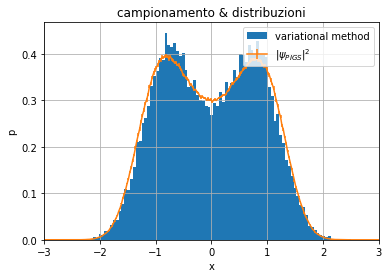

In [79]:
plt.hist(conf, bins=100, density=True,label='variational method')
plt.errorbar(ppigs8[:,0],ppigs8[:,1],yerr=ppigs8[:,2],label='$|\psi_{PIGS}|^2$')
plt.title('campionamento & distribuzioni')
plt.xlim((-3,3))
plt.xlabel("x")
plt.ylabel("p")
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Ora faccio variare i tempi immaginari:

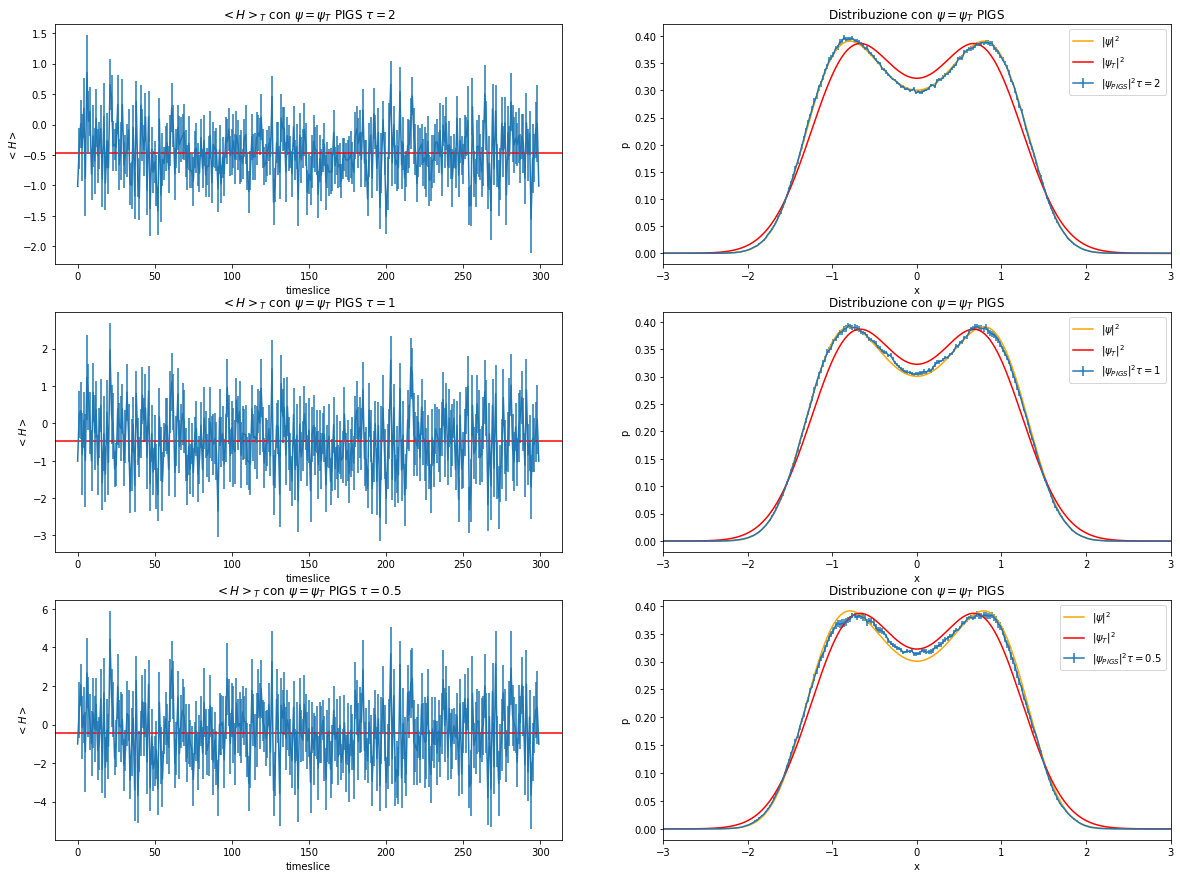

In [80]:
kpigs2=np.loadtxt('Dati/kinetic.My2.dat')
kpigs1=np.loadtxt('Dati/kinetic.My1.dat')
kpigs05=np.loadtxt('Dati/kinetic.My05.dat')

upigs2=np.loadtxt('Dati/potential.My2.dat')
upigs1=np.loadtxt('Dati/potential.My1.dat')
upigs05=np.loadtxt('Dati/potential.My05.dat')

ppigs2=np.loadtxt('Dati/probability.My2.dat')
ppigs1=np.loadtxt('Dati/probability.My1.dat')
ppigs05=np.loadtxt('Dati/probability.My05.dat')

Epigs2=kpigs2[:,1]+upigs2[:,1]
errepigs2=np.sqrt(kpigs2[:,2]**2+upigs2[:,2]**2)
Epigs1=kpigs1[:,1]+upigs1[:,1]
errepigs1=np.sqrt(kpigs1[:,2]**2+upigs1[:,2]**2)
Epigs05=kpigs05[:,1]+upigs05[:,1]
errepigs05=np.sqrt(kpigs05[:,2]**2+upigs05[:,2]**2)

figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,15))

axes[0,0].errorbar(upigs2[:,0],Epigs2,yerr=errepigs2)
axes[0,0].set_title('$<H>_T$ con $\psi=\psi_T$ PIGS $\\tau=2$')
axes[0,0].set_xlabel('timeslice')
axes[0,0].set_ylabel('$<H>$')
axes[0,0].axhline(y=-0.46046587969271535,color='red')

axes[0,1].errorbar(ppigs2[:,0],ppigs2[:,1],yerr=ppigs2[:,2],label='$|\psi_{PIGS}|^2 \\tau=2$')
axes[0,1].set_title('Distribuzione con $\psi=\psi_T$ PIGS')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('p')
axes[0,1].plot(x,(psi[0])**2, color='orange',label='$|\psi|^2$')
axes[0,1].plot(x,(psi_T)**2/norm[0], color='red',label='$|\psi_T|^2$')
axes[0,1].set_xlim(-3,3)
axes[0,1].legend()

axes[1,0].errorbar(upigs1[:,0],Epigs1,yerr=errepigs1)
axes[1,0].set_title('$<H>_T$ con $\psi=\psi_T$ PIGS $\\tau=1$')
axes[1,0].set_xlabel('timeslice')
axes[1,0].set_ylabel('$<H>$')
axes[1,0].axhline(y=-0.46046587969271535,color='red')

axes[1,1].errorbar(ppigs1[:,0],ppigs1[:,1],yerr=ppigs1[:,2],label='$|\psi_{PIGS}|^2 \\tau=1$')
axes[1,1].set_title('Distribuzione con $\psi=\psi_T$ PIGS')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('p')
axes[1,1].plot(x,(psi[0])**2, color='orange',label='$|\psi|^2$')
axes[1,1].plot(x,(psi_T)**2/norm[0], color='red',label='$|\psi_T|^2$')
axes[1,1].set_xlim(-3,3)
axes[1,1].legend()

axes[2,0].errorbar(upigs05[:,0],Epigs05,yerr=errepigs05)
axes[2,0].set_title('$<H>_T$ con $\psi=\psi_T$ PIGS $\\tau=0.5$')
axes[2,0].set_xlabel('timeslice')
axes[2,0].set_ylabel('$<H>$')
axes[2,0].axhline(y=-0.46046587969271535,color='red')

axes[2,1].errorbar(ppigs05[:,0],ppigs05[:,1],yerr=ppigs05[:,2],label='$|\psi_{PIGS}|^2 \\tau=0.5$')
axes[2,1].set_title('Distribuzione con $\psi=\psi_T$ PIGS')
axes[2,1].set_xlabel('x')
axes[2,1].set_ylabel('p')
axes[2,1].plot(x,(psi[0])**2, color='orange',label='$|\psi|^2$')
axes[2,1].plot(x,(psi_T)**2/norm[0], color='red',label='$|\psi_T|^2$')
axes[2,1].set_xlim(-3,3)
axes[2,1].legend()

plt.show()

Per la distribuzione di probabilità si inizia a notare un peggiornmento a $\tau=0.5$, nonostante si osservi fin da subito un aumento netto dell'errore di calcolo sulla energia del GS gia a $\tau=2$. Si mostra il plot delle enrgie per tutti e quattro i tempi immaginari presi in esame:

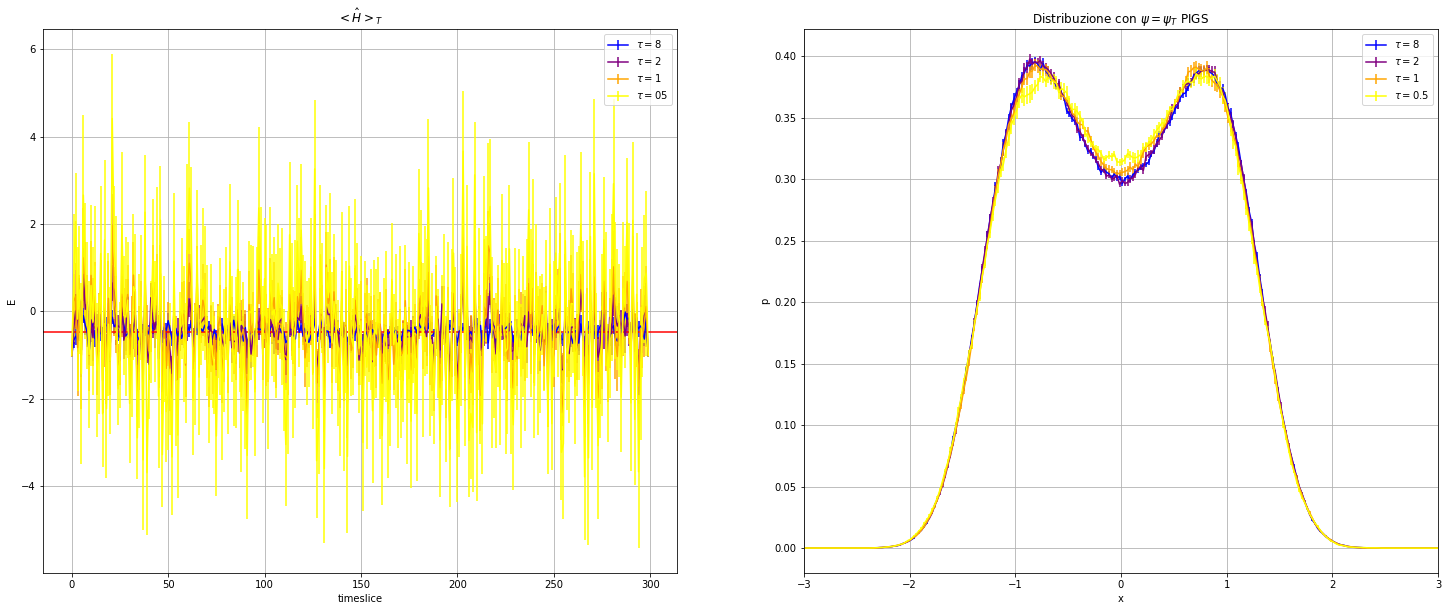

In [82]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(25,10))

axes[0].errorbar(upigs8[:,0],Epigs,yerr=errepigs,color='blue',label="$\\tau=8$")
axes[0].errorbar(upigs2[:,0],Epigs2,yerr=errepigs2,color='purple',label="$\\tau=2$")
axes[0].errorbar(upigs1[:,0],Epigs1,yerr=errepigs1,color='orange',label="$\\tau=1$")
axes[0].errorbar(upigs05[:,0],Epigs05,yerr=errepigs05,color='yellow',label="$\\tau=05$")
axes[0].set_xlabel('timeslice')
axes[0].set_ylabel('E')
axes[0].set_title('$< {\hat H} >_T$')
axes[0].axhline(y=-0.46046587969271535,color='red')
axes[0].grid(True)
axes[0].legend()


axes[1].errorbar(ppigs8[:,0],ppigs8[:,1],yerr=ppigs8[:,2],color='blue',label='$\\tau=8$')
axes[1].errorbar(ppigs2[:,0],ppigs2[:,1],yerr=ppigs2[:,2],color='purple',label='$\\tau=2$')
axes[1].errorbar(ppigs1[:,0],ppigs1[:,1],yerr=ppigs1[:,2],color='orange',label='$\\tau=1$')
axes[1].errorbar(ppigs05[:,0],ppigs05[:,1],yerr=ppigs05[:,2],color='yellow',label='$\\tau=0.5$')
axes[1].set_title('Distribuzione con $\psi=\psi_T$ PIGS')
axes[1].set_xlim((-3,3))
axes[1].set_xlabel("x")
axes[1].set_ylabel("p")
axes[1].grid(True)
axes[1].legend()

plt.show()

Ora effettuo la misura con l'algoritmo PIMC con le temperature di $T=1.25$ e $T=3$:

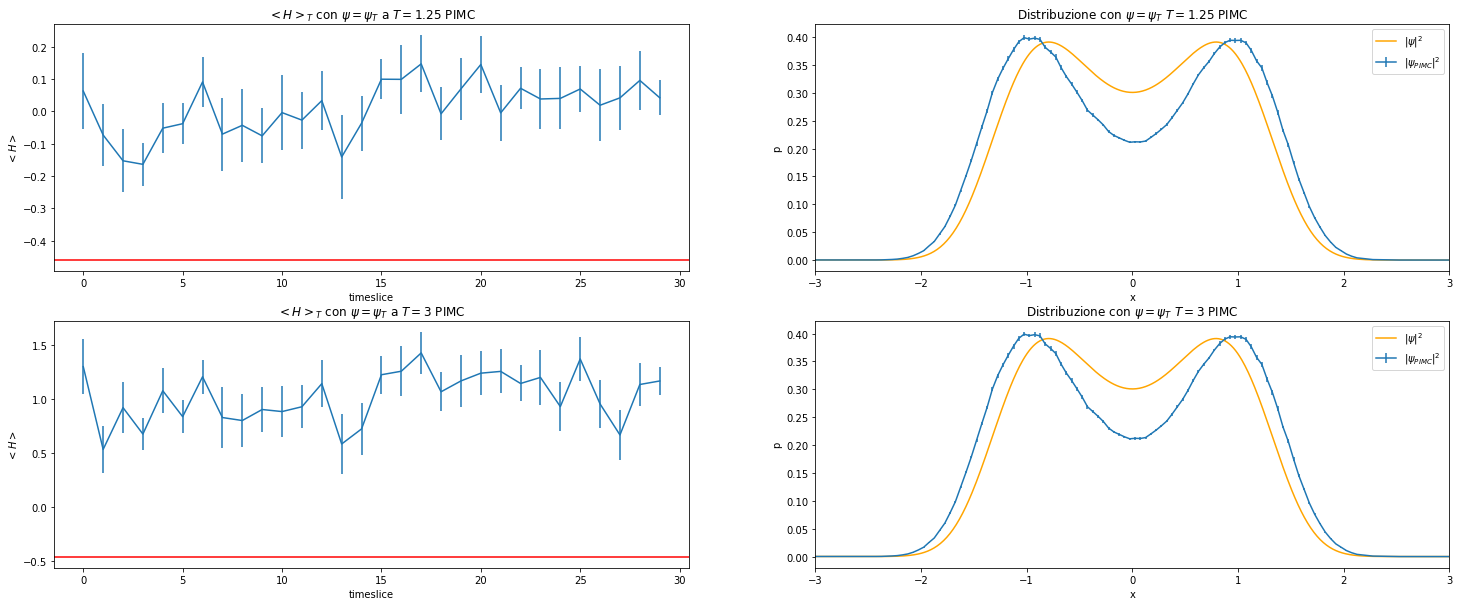

In [85]:
kpimc=np.loadtxt('Dati/kinetic.T125.dat')
upimc=np.loadtxt('Dati/potential.T125.dat')
ppimc=np.loadtxt('Dati/probability.T125.dat')
kpimc3=np.loadtxt('Dati/kinetic.T3.dat')
upimc3=np.loadtxt('Dati/potential.T3.dat')
ppimc3=np.loadtxt('Dati/probability.T3.dat')


Epimc=kpimc[:,1]+upimc[:,1]
errepimc=np.sqrt(kpimc[:,2]**2+upimc[:,2]**2)
Epimc3=kpimc3[:,1]+upimc3[:,1]
errepimc3=np.sqrt(kpimc3[:,2]**2+upimc3[:,2]**2)

figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(25,10))
axes[0,0].errorbar(upimc[:,0],Epimc,yerr=errepimc)
axes[0,0].set_title('$<H>_T$ con $\psi=\psi_T$ a $T=1.25$ PIMC')
axes[0,0].set_xlabel('timeslice')
axes[0,0].set_ylabel('$<H>$')
axes[0,0].axhline(y=-0.46046587969271535,color='red')

axes[0,1].errorbar(ppimc[:,0],ppimc[:,1],yerr=ppimc[:,2],label='$|\psi_{PIMC}|^2$')
axes[0,1].set_title('Distribuzione con $\psi=\psi_T$ $T=1.25$ PIMC')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('p')
axes[0,1].set_xlim(-3,3)
axes[0,1].plot(x,(psi[0])**2, color='orange',label='$|\psi|^2$')
axes[0,1].legend()

axes[1,0].errorbar(upimc3[:,0],Epimc3,yerr=errepimc3)
axes[1,0].set_title('$<H>_T$ con $\psi=\psi_T$ a $T=3$ PIMC')
axes[1,0].set_xlabel('timeslice')
axes[1,0].set_ylabel('$<H>$')
axes[1,0].axhline(y=-0.46046587969271535,color='red')

axes[1,1].errorbar(ppimc[:,0],ppimc[:,1],yerr=ppimc[:,2],label='$|\psi_{PIMC}|^2$')
axes[1,1].set_title('Distribuzione con $\psi=\psi_T$ $T=3$ PIMC')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('p')
axes[1,1].set_xlim(-3,3)
axes[1,1].plot(x,(psi[0])**2, color='orange',label='$|\psi|^2$')
axes[1,1].legend()
plt.show()

Non si osserva un match perfetto coi parametri forniti in quanto non mi trovo più nel GS, infatti più aumento T e meno ho similarità coi parametri di GS, infatti passo da una stato puro di GS a T=0 a uno stato misto in cui ho anche stati eccitati il cui peso dipende dalla T, tant'è che si osserva che l'energia aumenta all'aumentare di T.